<h1>TAS Analysis</h1>

In [55]:
from importlib import reload
from tools import tas
reload(tas)

tas = tas.UI()

Output()

Output()

C:\Users\larue\AppData\Local\Temp\ipykernel_29736\1495485177.py:47: OptimizeWarning:

Covariance of the parameters could not be estimated



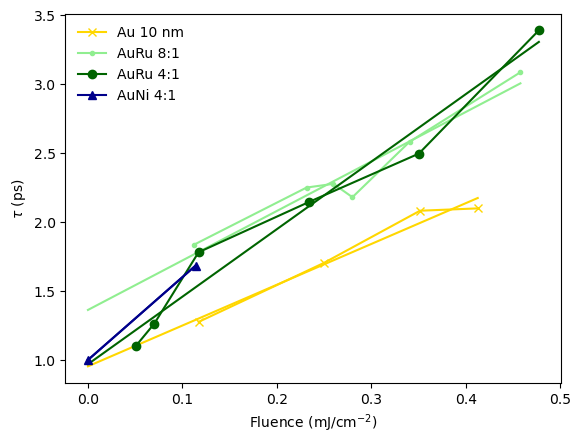

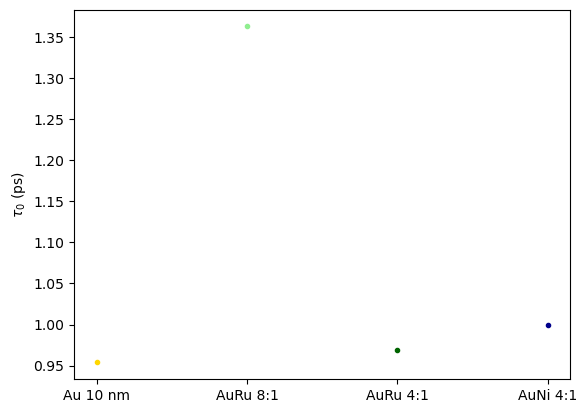

In [151]:
# Au Stock (12/1/2025)
# AuRu 8:1 (12/2/2025)
# AuRu 4:1 (12/3/2025)

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.constants import *

def linear(x,m,b):
    return m*x+b

d = 50
r = d/2
r_cm = r/1e4
a = pi*r_cm**2
f = 1e6

tas = {}

tas['Au 10 nm'] = {}
tas['Au 10 nm']['Color'] = 'Gold'
tas['Au 10 nm']['Marker'] = 'x'
tas['Au 10 nm']['Power'] = np.array([2.3,4.9,6.9,8.1])
tas['Au 10 nm']['Tau'] = np.array([1.276,1.703,2.082,2.099])

tas['AuRu 8:1'] = {}
tas['AuRu 8:1']['Color'] = 'Lightgreen'
tas['AuRu 8:1']['Marker'] = '.'
tas['AuRu 8:1']['Power'] = np.array([2.2,4.543,5.101,5.496,6.687,8.987])
tas['AuRu 8:1']['Tau'] = np.array([1.835,2.250,2.277,2.180,2.583,3.086])

tas['AuRu 4:1'] = {}
tas['AuRu 4:1']['Color'] = 'Darkgreen'
tas['AuRu 4:1']['Marker'] = 'o'
tas['AuRu 4:1']['Power'] = np.array([0.996,1.380,2.299,4.597,6.876,9.370])
tas['AuRu 4:1']['Tau'] = np.array([1.102,1.264,1.781,2.146,2.496,3.390])

tas['AuNi 4:1'] = {}
tas['AuNi 4:1']['Color'] = 'Darkblue'
tas['AuNi 4:1']['Marker'] = '^'
tas['AuNi 4:1']['Power'] = np.array([0,2.236])
tas['AuNi 4:1']['Tau'] = np.array([1,1.684])

for key in tas :
    tas[key]['Fluence'] = tas[key]['Power']/f/a
    popt, pcov = curve_fit(linear, tas[key]['Fluence'], tas[key]['Tau'])
    tas[key]['Tau_0'] = popt[1]
    tas[key]['Fluence_fit'] = np.linspace(0, np.max(tas[key]['Fluence']), 101)
    tas[key]['Tau_fit'] = linear(tas[key]['Fluence_fit'], *popt)
    plt.plot(tas[key]['Fluence'],tas[key]['Tau'],marker=tas[key]['Marker'],color=tas[key]['Color'],label=key)
    plt.plot(tas[key]['Fluence_fit'],tas[key]['Tau_fit'],"-",color=tas[key]['Color'],label='')

plt.legend(frameon=False)
plt.xlabel("Fluence (mJ/cm$^{-2}$)")
plt.ylabel("$\\tau$ (ps)")
plt.show()

for key in tas :
    plt.plot(key,tas[key]['Tau_0'],'.',color=tas[key]['Color'])

plt.ylabel('$\\tau_0$ (ps)')
plt.show()